In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from math import sqrt 
from math import ceil
from math import log

import numpy as np
from numpy.random import multivariate_normal, randn, uniform

import torch

from scipy.linalg import toeplitz
from scipy.linalg import norm
from scipy.linalg import svdvals
from scipy.linalg import qr
from scipy.optimize import fmin_l_bfgs_b

from algoritms.gradient_descent import sgd
from problems.regression import RegPb
from problems.over_parameterized_regression import OverParamRegPb
from problems.matric_factorization import MatFactPb
from utils.utils import visualize, create_r_rank_mat

# Exercice 1

In [2]:
np.random.seed(1)
torch.manual_seed(1)

# Problem variables
n = 100
X = np.random.normal(0, 1, n).reshape(n, 1)
y = np.random.normal(0, 1, n).reshape(n, 1)

### Question 1.a.

### Question 1a)

$$
\frac{1}{2 n}\|\boldsymbol{w} \boldsymbol{x}-\boldsymbol{y}\|^{2} = \frac{1}{2 n} \sum_{i=1}^{n} (w x_i - y_i)^2
$$
$$
\frac{\partial}{\partial w} \left( \frac{1}{2 n} \sum_{i=1}^{n} (w x_i - y_i)^2 \right) = 0
$$
$$
\frac{1}{n} \sum_{i=1}^{n} x_i (w x_i - y_i) = 0
$$
$$
w \sum_{i=1}^{n} x_i^2 = \sum_{i=1}^{n} x_i y_i
$$
$$
w^* = \frac{x^{T}y}{x^{T}x}
$$

L'ensemble des solutions du problème est donc $\{w^*\}$, où $w^*$ est défini ci-dessus, sous réserve que $\boldsymbol{x}$ soit non nul.


### Question 1.b.

k: 0 | loss: 4.52e-01 | lr: 1.00e+00
k: 1 | loss: 4.44e-01 | lr: 7.07e-01
k: 2 | loss: 4.42e-01 | lr: 5.77e-01
k: 3 | loss: 4.42e-01 | lr: 5.00e-01
k: 4 | loss: 4.42e-01 | lr: 4.47e-01
k: 5 | loss: 4.42e-01 | lr: 4.08e-01
k: 6 | loss: 4.42e-01 | lr: 3.78e-01
k: 7 | loss: 4.42e-01 | lr: 3.54e-01
k: 8 | loss: 4.42e-01 | lr: 3.33e-01
k: 9 | loss: 4.41e-01 | lr: 3.16e-01


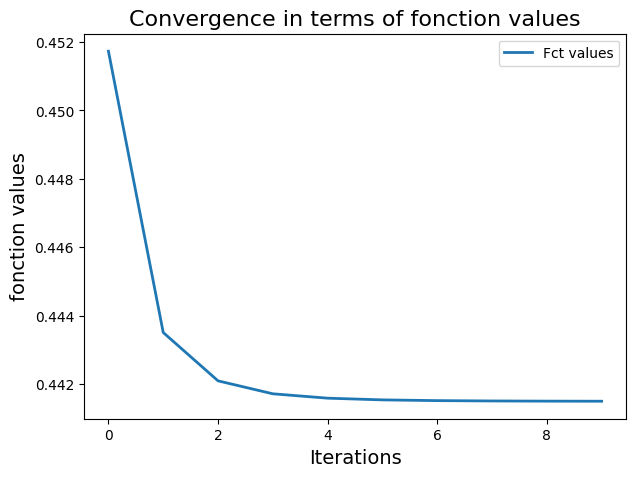

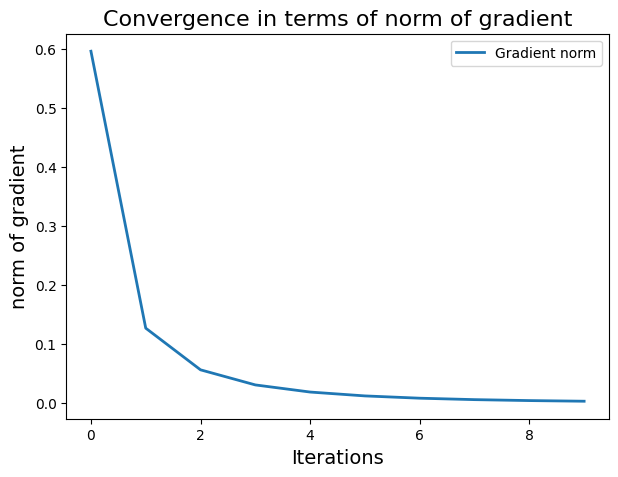

In [3]:
# Problem initialization
w0 = np.random.rand(1).reshape(1, 1)
pblinreg = RegPb(X=X, y=y, w=w0, lambda_reg=0)
n = batch_size = pblinreg.n

# Gradient Descent (batch_size = n)
loss_vals = sgd(
    pblinreg,
    stepchoice=0.5,
    init_step=1,
    batch_size=n,
    n_iter=10,
    verbose=True,
)
visualize(data={"Fct values": loss_vals}, subject="fonction values")
visualize(data={"Gradient norm": pblinreg.g_norm_list}, subject="norm of gradient")

### Question 2.a.

Pour justifier que la valeur du problème (2) est toujours 0, considérons le problème d'optimisation suivant :

$$
\underset{\boldsymbol{W} \in \mathbb{R}^{n \times n}}{\operatorname{minimize}} f(\boldsymbol{W}):=\frac{1}{2 n}\|\boldsymbol{W} \boldsymbol{x}-\boldsymbol{y}\|^{2}
$$

Nous devons montrer qu'il existe une matrice $\boldsymbol{W}$ telle que $\boldsymbol{W} \boldsymbol{x} = \boldsymbol{y}$, ce qui implique que .

Puisque $\boldsymbol{x}$ est un vecteur non nul, nous pourrons toujours construire $\boldsymbol{W}$ comme une “matrice de projection“ ou "combinaison linéraire qui permettra de vérifier $\|\boldsymbol{W} \boldsymbol{x} - \boldsymbol{y}\| = 0$. Même si $\boldsymbol{x}$ et $\boldsymbol{y}$ sont colinéaires, alors on pourra construire une combinaison linéaire qui annulera la différence.


### Question 2.b.

k: 0 | loss: 4.51e+01 | lr: 1.00e+00
k: 1 | loss: 2.04e+00 | lr: 8.41e-01
k: 2 | loss: 2.33e-01 | lr: 7.60e-01
k: 3 | loss: 3.77e-02 | lr: 7.07e-01
k: 4 | loss: 7.41e-03 | lr: 6.69e-01
k: 5 | loss: 1.66e-03 | lr: 6.39e-01
k: 6 | loss: 4.11e-04 | lr: 6.15e-01
k: 7 | loss: 1.09e-04 | lr: 5.95e-01
k: 8 | loss: 3.09e-05 | lr: 5.77e-01
k: 9 | loss: 9.21e-06 | lr: 5.62e-01


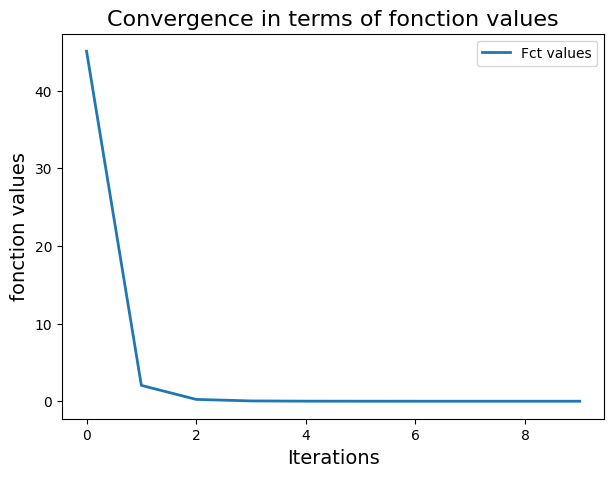

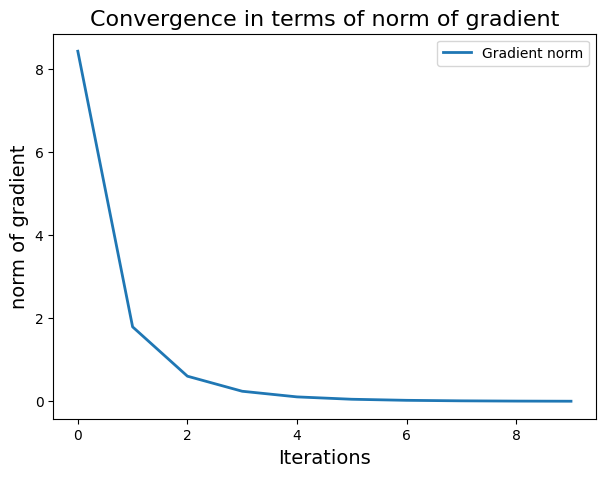

In [4]:
# Problem variables
W0 = np.random.normal(0, 1, (n, n))
pblinreg = OverParamRegPb(X=X, y=y, W=W0, lambda_reg=0)

# Gradient Descent (batch_size = n)
loss_vals = sgd(
    pblinreg,
    stepchoice=0.25,
    init_step=1,
    batch_size=int(n),
    n_iter=10,
    verbose=True,
)
visualize(data={"Fct values": loss_vals}, subject="fonction values")
visualize(data={"Gradient norm": pblinreg.W_grad_norm_list}, subject="norm of gradient")

# Exercice 2

## Questions 3.a. & 3.b.

Après avoir tester plusieurs seeds, il semble que les tailles de **batch 3 à 10** sont celles qui permettent la convergence la plus rapide et stable. Une taille de 1 converge aussi très vite mais montre une trop grand variance.

In [6]:
# Problem variables
np.random.seed(1)
torch.manual_seed(1)

n1, n2 = 10, 20
n = n1 + n2
x = torch.tensor(np.random.normal(0, 1, n1))
z = torch.tensor(np.random.normal(0, 1, n2))
X = torch.outer(x, z)

# Algo variables
lr = 0.1
stepchoice = 0  # Constant lr
n_iter = 1000

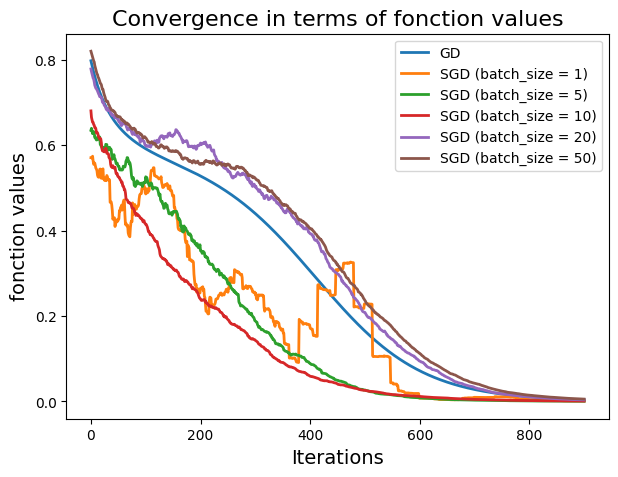

In [7]:
loss_vals = {}

# Gradient descent
gd_pbmatfact = MatFactPb(n1, n2, X)
loss_vals["GD"] = sgd(
    gd_pbmatfact,
    stepchoice=stepchoice,
    init_step=lr,
    n_iter=n_iter,
    batch_size=None,
    verbose=False,
)

# Stochastic gradient descent
for batch_size in [1, 5, 10, 20, 50]:
    sgd_pbmatfact = MatFactPb(n1, n2, X)
    loss_vals[f"SGD (batch_size = {batch_size})"] = sgd(
        sgd_pbmatfact,
        stepchoice=stepchoice,
        init_step=lr,
        n_iter=n_iter,
        batch_size=batch_size,
    )

# Visualization
visualize(data=loss_vals, subject="fonction values", window_size=100)

## Questions 4.a. & 4.b.

* **Cas Rank(X) = 5, r = 5:** GD et SGD semblent plutôt équivalents et SGD a une petite variance. Cependant, GD converge vers une valeur légèrement plus optimale en moyenne mais un peu moins vite.

* **Rank(X) = min(n1, n2), r = 1**: Ici on essaye d'approximer une matrice de rang r avec une matrice de rang 1. On converge donc vers une valeur peu optimale.On observe alors que SGD a une variance trop importante. Des tailles de batch plus élevées ne permettent pas une amélioration significative par rapport à GD (voir courbe verte). GD et SGD convergent vers la même valeur mais GD garantit de ne pas avoir de variance et avec la même vitesse de convergence.

In [8]:
# Problem variables
np.random.seed(1)
torch.manual_seed(1)

n1, n2 = 10, 20
n = n1 + n2
r1, r5, r_min = 1, 5, min(n1, n2)

# Cas 1
U_r5 = torch.randn(n1, r5)
V_r5 = torch.randn(n2, r5)
X_r5 = U_r5 @ V_r5.T

# Cas 2
X_rmin = create_r_rank_mat(dim=(n1, n2), r=r_min)

# Algo variables
lr_cas_1, lr_cas_2 = 0.03, 0.01
stepchoice = 0  # Constant lr
n_iter_1, n_iter_2 = 10000, 5000

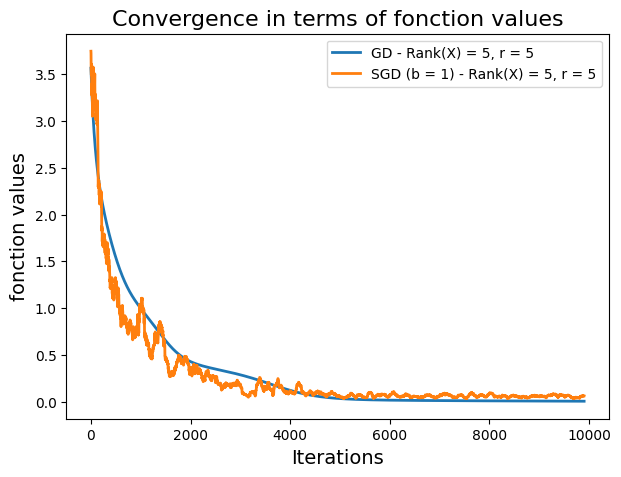

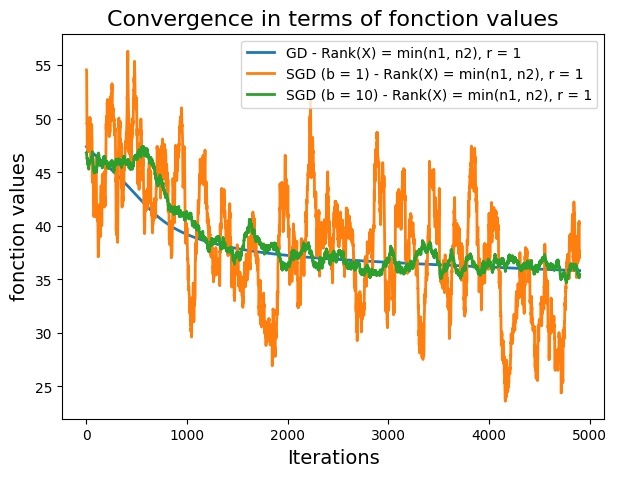

In [11]:
########### Comparaison GD et SGD pour Rank(X) = 5, r = 5 ###########
r5_loss_vals = {}

gd_r5_pbmatfact = MatFactPb(n1, n2, X_r5, r=r5)
sgd_r5_pbmatfact = MatFactPb(n1, n2, X_r5, r=r5)

r5_loss_vals["GD - Rank(X) = 5, r = 5"] = sgd(
    gd_r5_pbmatfact, init_step=lr_cas_1, n_iter=n_iter_1, batch_size=None
)
r5_loss_vals[f"SGD (b = 1) - Rank(X) = 5, r = 5"] = sgd(
    sgd_r5_pbmatfact,
    init_step=lr_cas_1,
    n_iter=n_iter_1,
    batch_size=1,
)

########### Comparaison GD et SGD pour Rank(X) = min(n1, n2), r = 1 ###########
r1_loss_vals = {}

gd_rmin_pbmatfact = MatFactPb(n1, n2, X_rmin, r=r1)
sgd_rmin_pbmatfact = MatFactPb(n1, n2, X_rmin, r=r1)

r1_loss_vals["GD - Rank(X) = min(n1, n2), r = 1"] = sgd(
    gd_rmin_pbmatfact, init_step=lr_cas_2, n_iter=n_iter_2, batch_size=None
)
r1_loss_vals[f"SGD (b = 1) - Rank(X) = min(n1, n2), r = 1"] = sgd(
    sgd_rmin_pbmatfact,
    init_step=lr_cas_2,
    n_iter=n_iter_2,
    batch_size=1,
)
sgd_rmin_pbmatfact = MatFactPb(n1, n2, X_rmin, r=r1)
r1_loss_vals[f"SGD (b = 10) - Rank(X) = min(n1, n2), r = 1"] = sgd(
    sgd_rmin_pbmatfact,
    init_step=lr_cas_2,
    n_iter=n_iter_2,
    batch_size=10,
)

visualize(data=r5_loss_vals, subject="fonction values", window_size=100)
visualize(data=r1_loss_vals, subject="fonction values", window_size=100)

# Exercice 3


## Questions 5.a. & 5.b.

* Quand lambda est proche de 0, GD et SGD sont relativement équivalent pour un lambda très proche de 0 (0 < lambda < 0.01).
* La valeur vers laquelle GD est détériorée (là où SGD n'est pas impacté, il continue de converger vers 0.5) lorque lambda est plus élevée (ex: 0.01, 0.1).
* Enfin, quand lambda se rapproche de 1 (ex: lamda = 1), la valeur optimale de SGD est détériorée et les deux variant redeviennent relativement équivalentes. De plus, la variance de SGD a tendance à diminuer quand lambda augmente.

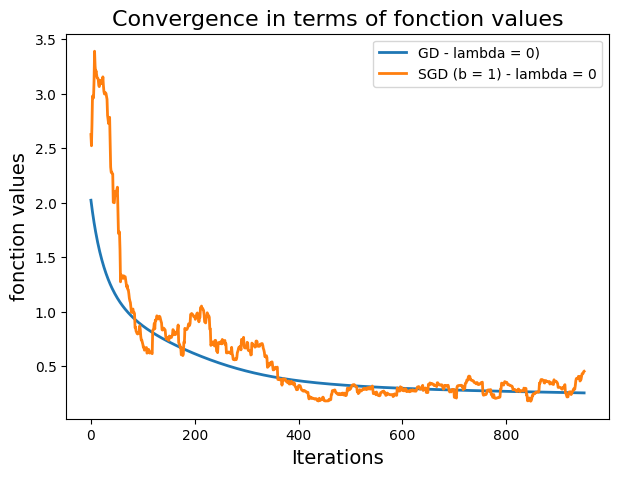

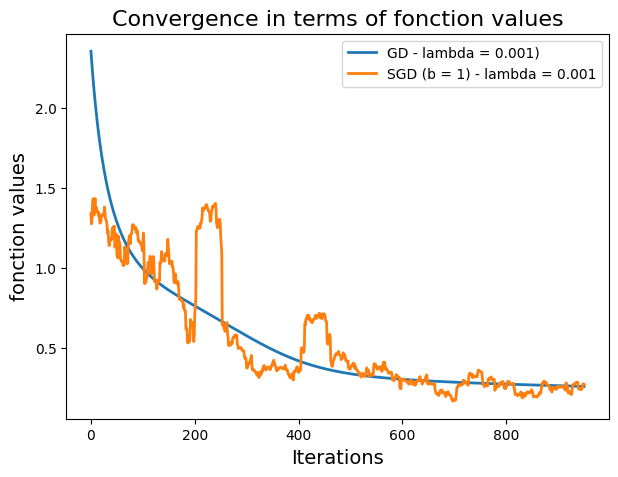

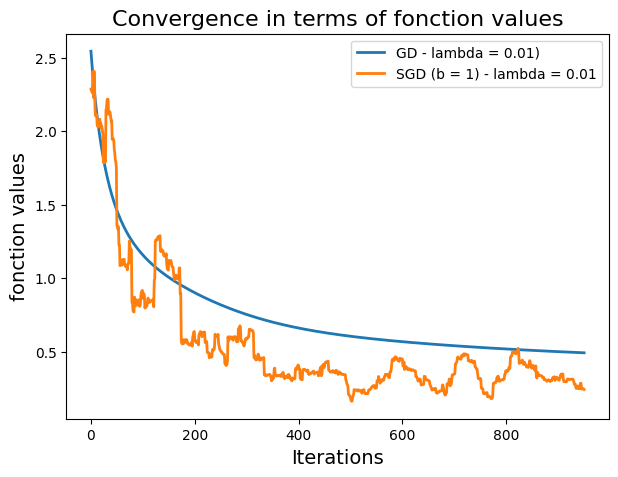

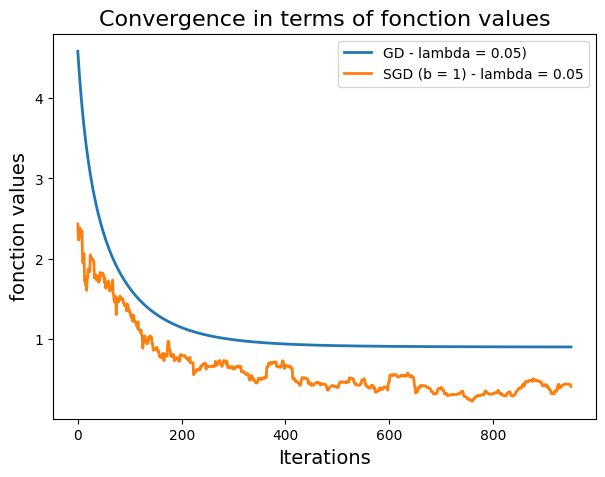

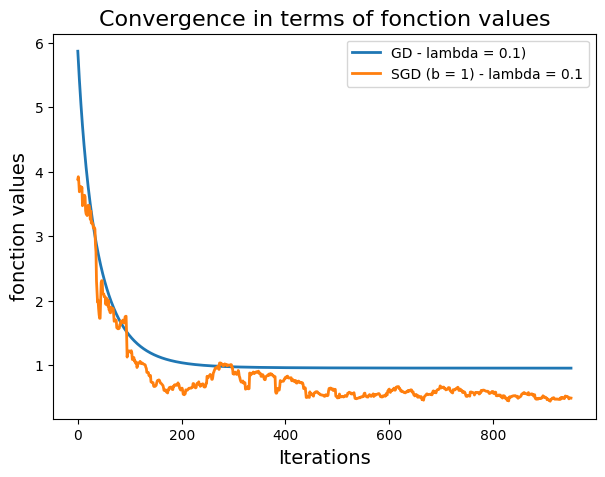

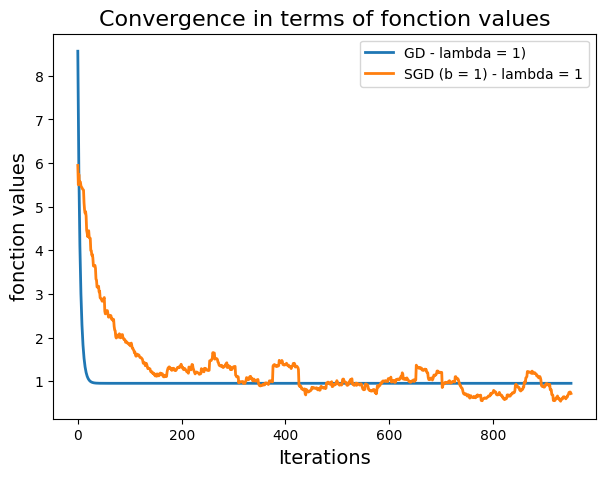

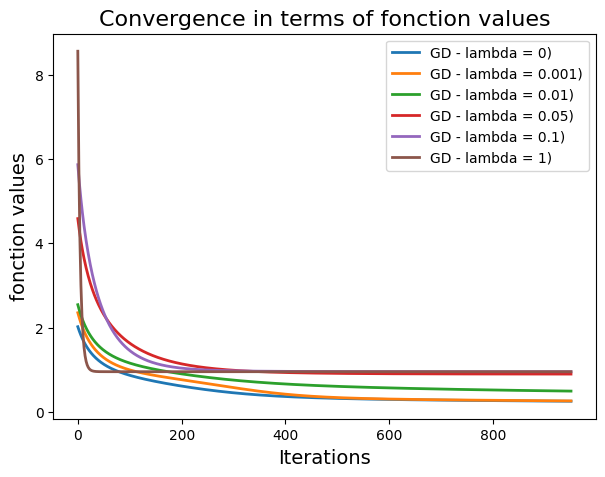

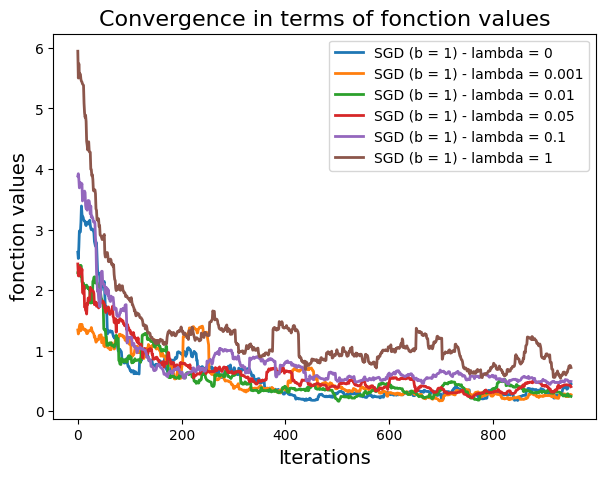

In [23]:
# Problem variables
np.random.seed(1)
torch.manual_seed(1)

n1, n2 = 10, 20
n = n1 + n2
r = 5
x = torch.tensor(np.random.normal(0, 1, n1))
z = torch.tensor(np.random.normal(0, 1, n2))
eps = torch.tensor(np.random.normal(0, 1, (n1, n2)))
X_norm = torch.outer(x, z)
X = X_norm + eps

# Algo variables
lr = 0.1
stepchoice = 0  # Constant lr
n_iter = 1000
lambdas = [0, 0.001, 0.01, 0.05, 0.1, 1]

gd_lambda_loss_vals = {}
sgd_lambda_loss_vals = {}

# Stochastic gradient descent
for lbda in lambdas:
    lambda_loss_vals = {}

    gd_pbmatfact = MatFactPb(n1, n2, X, r=r, lambda_reg=lbda)
    sgd_pbmatfact = MatFactPb(n1, n2, X, r=r, lambda_reg=lbda)
    gd_loss_vals = sgd(
        gd_pbmatfact,
        stepchoice=stepchoice,
        init_step=lr,
        n_iter=n_iter,
        batch_size=None,
    )
    lambda_loss_vals[f"GD - lambda = {lbda})"] = gd_loss_vals
    gd_lambda_loss_vals[f"GD - lambda = {lbda})"] = gd_loss_vals

    sgd_loss_vals = sgd(
        sgd_pbmatfact,
        stepchoice=stepchoice,
        init_step=lr,
        n_iter=n_iter,
        batch_size=1,
    )
    lambda_loss_vals[f"SGD (b = {1}) - lambda = {lbda}"] = sgd_loss_vals
    sgd_lambda_loss_vals[f"SGD (b = {1}) - lambda = {lbda}"] = sgd_loss_vals

    visualize(data=lambda_loss_vals, subject="fonction values", window_size=50)

visualize(data=gd_lambda_loss_vals, subject="fonction values", window_size=50)
visualize(data=sgd_lambda_loss_vals, subject="fonction values", window_size=50)

## Questions 5.c. & 5.d.

En mettant r = 1, afin de s'assurer d'avoir une solution de rang 1. On calcule la distance entre uv.T et xz.T après l'entrainement. On conclut deux points:
* GD donne une solution uv.T de rang 1 proche de xz.T pour tout lambda inférieur à 0.01; au dessus, la distance est nettement plus élevée. Pour SGD, la frontière de lambda se trouve aux alentours de 0.25-0.5. **Sur 1000 itérations**, on observe tout de même une distance élevé pour une lambda = 0.05 (voir premier output). Sur 5000 opérations, ce n'est pas le cas (voir deuxième output).
* On en déduit que les résultats diffèrent selon l'algorithme utilisé. Plus particulièrement, SGD peut demander plus d'itérattions pour assurer une frontière lambda stable. En contrepartie, il permet d'assurer une bonne convergence pour des lambda plus élevés (= moins sensible / restrictif par rapport au paramètre de régularisation.)


-------- GD --------

GD - lambda = 0 - distance(uv, xz): 4.028332377934071
GD - lambda = 0.001 - distance(uv, xz): 4.434069760434646
GD - lambda = 0.01 - distance(uv, xz): 4.929736964369727
GD - lambda = 0.05 - distance(uv, xz): 11.097035764113235
GD - lambda = 0.1 - distance(uv, xz): 15.29089945845277
GD - lambda = 0.25 - distance(uv, xz): 15.292430354531632
GD - lambda = 0.5 - distance(uv, xz): 15.292430354531632
GD - lambda = 1 - distance(uv, xz): 15.292430354531632

-------- SGD --------

SGD - lambda = 0 - distance(uv, xz): 5.958064894089762
SGD - lambda = 0.001 - distance(uv, xz): 8.386324809814765
SGD - lambda = 0.01 - distance(uv, xz): 5.609479357363615
SGD - lambda = 0.05 - distance(uv, xz): 13.617229018180387
SGD - lambda = 0.1 - distance(uv, xz): 7.312791004364314
SGD - lambda = 0.25 - distance(uv, xz): 6.261234425344574
SGD - lambda = 0.5 - distance(uv, xz): 9.882363103996873
SGD - lambda = 1 - distance(uv, xz): 14.946811411076217


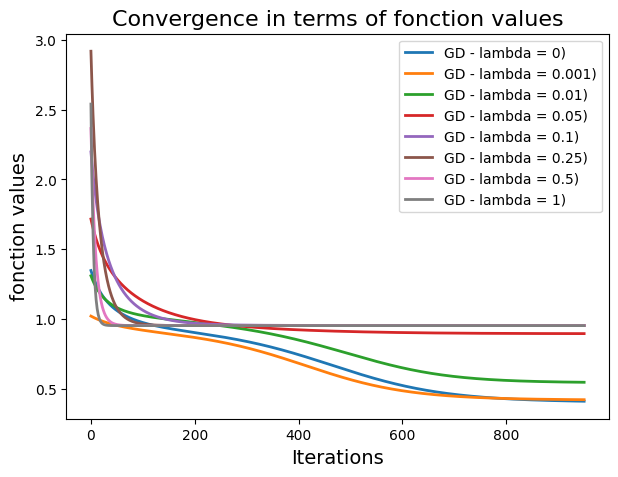

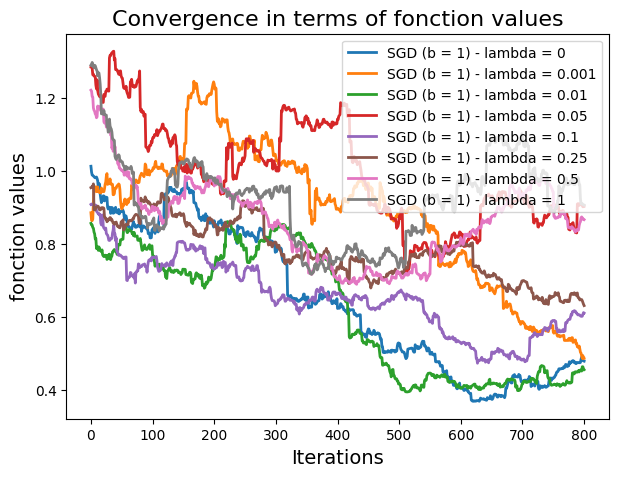

In [12]:
# Problem variables
np.random.seed(1)
torch.manual_seed(1)

n1, n2 = 10, 20
n = n1 + n2
r = 1
x = torch.tensor(np.random.normal(0, 1, n1))
z = torch.tensor(np.random.normal(0, 1, n2))
eps = torch.tensor(np.random.normal(0, 1, (n1, n2)))
X_norm = torch.outer(x, z)
X = X_norm + eps

# Algo variables
lr = 0.1
stepchoice = 0  # Constant lr
n_iter = 1000
lambdas = [0, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 1]

gd_lambda_loss_vals = {}
sgd_lambda_loss_vals = {}

print("-------- GD --------\n")
for lbda in lambdas:
    gd_pbmatfact = MatFactPb(n1, n2, X, r=r, lambda_reg=lbda)
    gd_lambda_loss_vals[f"GD - lambda = {lbda})"] = sgd(
        gd_pbmatfact,
        stepchoice=stepchoice,
        init_step=lr,
        n_iter=n_iter,
        batch_size=None,
    )
    print(
        f"GD - lambda = {lbda} - distance(uv, xz): {gd_pbmatfact.UV_xz_distance(X_norm)}"
    )
visualize(data=gd_lambda_loss_vals, subject="fonction values", window_size=50)

print("\n-------- SGD --------\n")
for lbda in lambdas:
    sgd_pbmatfact = MatFactPb(n1, n2, X, r=r, lambda_reg=lbda)
    sgd_lambda_loss_vals[f"SGD (b = {1}) - lambda = {lbda}"] = sgd(
        sgd_pbmatfact,
        stepchoice=stepchoice,
        init_step=lr,
        n_iter=n_iter,
        batch_size=1,
    )
    print(
        f"SGD - lambda = {lbda} - distance(uv, xz): {sgd_pbmatfact.UV_xz_distance(X_norm)}"
    )
visualize(data=sgd_lambda_loss_vals, subject="fonction values", window_size=200)

-------- GD --------

GD - lambda = 0 - distance(uv, xz): 4.168903982472967
GD - lambda = 0.001 - distance(uv, xz): 4.169252796876678
GD - lambda = 0.01 - distance(uv, xz): 4.58365650798062
GD - lambda = 0.05 - distance(uv, xz): 10.748567425979052
GD - lambda = 0.1 - distance(uv, xz): 15.292430354530216
GD - lambda = 0.25 - distance(uv, xz): 15.292430354531632
GD - lambda = 0.5 - distance(uv, xz): 15.292430354531632
GD - lambda = 1 - distance(uv, xz): 15.292430354531632

-------- SGD --------

SGD - lambda = 0 - distance(uv, xz): 5.4670105565130624
SGD - lambda = 0.001 - distance(uv, xz): 5.545607998897751
SGD - lambda = 0.01 - distance(uv, xz): 6.04715184118381
SGD - lambda = 0.05 - distance(uv, xz): 5.858513061301478
SGD - lambda = 0.1 - distance(uv, xz): 4.36557392370841
SGD - lambda = 0.25 - distance(uv, xz): 7.310474776589932
SGD - lambda = 0.5 - distance(uv, xz): 8.966023868237363
SGD - lambda = 1 - distance(uv, xz): 14.860572524985633


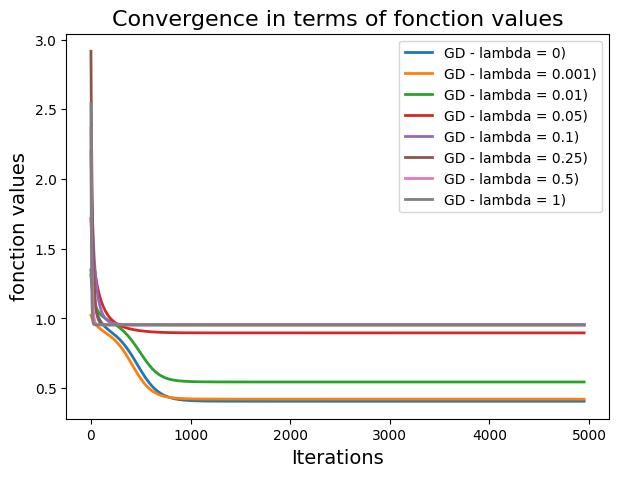

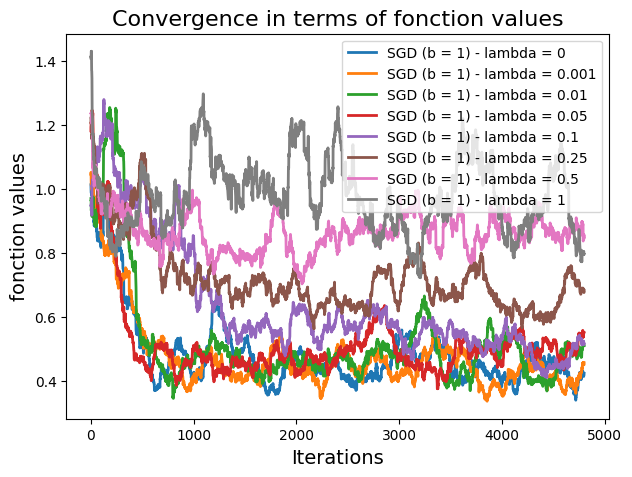

In [13]:
# Problem variables
np.random.seed(1)
torch.manual_seed(1)

n1, n2 = 10, 20
n = n1 + n2
r = 1
x = torch.tensor(np.random.normal(0, 1, n1))
z = torch.tensor(np.random.normal(0, 1, n2))
eps = torch.tensor(np.random.normal(0, 1, (n1, n2)))
X_norm = torch.outer(x, z)
X = X_norm + eps

# Algo variables
lr = 0.1
stepchoice = 0  # Constant lr
n_iter = 5000
lambdas = [0, 0.001, 0.01, 0.05, 0.1, 0.25, 0.5, 1]

gd_lambda_loss_vals = {}
sgd_lambda_loss_vals = {}

print("-------- GD --------\n")
for lbda in lambdas:
    gd_pbmatfact = MatFactPb(n1, n2, X, r=r, lambda_reg=lbda)
    gd_lambda_loss_vals[f"GD - lambda = {lbda})"] = sgd(
        gd_pbmatfact,
        stepchoice=stepchoice,
        init_step=lr,
        n_iter=n_iter,
        batch_size=None,
    )
    print(
        f"GD - lambda = {lbda} - distance(uv, xz): {gd_pbmatfact.UV_xz_distance(X_norm)}"
    )
visualize(data=gd_lambda_loss_vals, subject="fonction values", window_size=50)

print("\n-------- SGD --------\n")
for lbda in lambdas:
    sgd_pbmatfact = MatFactPb(n1, n2, X, r=r, lambda_reg=lbda)
    sgd_lambda_loss_vals[f"SGD (b = {1}) - lambda = {lbda}"] = sgd(
        sgd_pbmatfact,
        stepchoice=stepchoice,
        init_step=lr,
        n_iter=n_iter,
        batch_size=1,
    )
    print(
        f"SGD - lambda = {lbda} - distance(uv, xz): {sgd_pbmatfact.UV_xz_distance(X_norm)}"
    )
visualize(data=sgd_lambda_loss_vals, subject="fonction values", window_size=200)

# Sandbox